# Resolução do exercicio 3

Agora é hora de arregaçar as mangas! Vamos trabalhar com dados fictícios de transações em uma cafeteria, simulando um cenário real onde precisamos limpar e preparar as informações antes de qualquer análise e modelo de IA

## Importanto as bibliotecas

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Carregando o dataset

In [67]:
df = pd.read_csv('/content/dirty_cafe_sales.csv')
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


Aqui já conseguimos ver alguns pontos que precisamos tratar para não ter problema no pré-processamento "UNKNOWN" e "ERROR" para NaN

In [68]:
# verificando se há outros valores que deveriam estar como NaN
df.Item.unique()

array(['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', 'UNKNOWN',
       'Sandwich', nan, 'ERROR', 'Juice', 'Tea'], dtype=object)

In [69]:
df.Quantity.unique()

array(['2', '4', '5', '3', '1', 'ERROR', 'UNKNOWN', nan], dtype=object)

In [70]:
df['Price Per Unit'].unique()

array(['2.0', '3.0', '1.0', '5.0', '4.0', '1.5', nan, 'ERROR', 'UNKNOWN'],
      dtype=object)

In [71]:
df['Total Spent'].unique()

array(['4.0', '12.0', 'ERROR', '10.0', '20.0', '9.0', '16.0', '15.0',
       '25.0', '8.0', '5.0', '3.0', '6.0', nan, 'UNKNOWN', '2.0', '1.0',
       '7.5', '4.5', '1.5'], dtype=object)

In [72]:
df['Payment Method'].unique()

array(['Credit Card', 'Cash', 'UNKNOWN', 'Digital Wallet', 'ERROR', nan],
      dtype=object)

In [73]:
df.Location.unique()

array(['Takeaway', 'In-store', 'UNKNOWN', nan, 'ERROR'], dtype=object)

In [74]:
df['Transaction Date'].unique()

array(['2023-09-08', '2023-05-16', '2023-07-19', '2023-04-27',
       '2023-06-11', '2023-03-31', '2023-10-06', '2023-10-28',
       '2023-07-28', '2023-12-31', '2023-11-07', 'ERROR', '2023-05-03',
       '2023-06-01', '2023-03-21', '2023-11-15', '2023-06-10',
       '2023-02-24', '2023-03-25', '2023-01-15', '2023-04-04',
       '2023-03-30', '2023-12-01', '2023-09-18', '2023-06-03',
       '2023-12-13', '2023-04-20', '2023-04-10', '2023-03-11',
       '2023-06-02', '2023-11-06', '2023-08-15', '2023-10-09',
       '2023-05-28', '2023-07-17', '2023-04-29', '2023-06-08',
       '2023-06-29', '2023-04-17', '2023-12-22', '2023-01-10',
       '2023-10-02', '2023-02-23', '2023-03-22', '2023-11-03',
       '2023-03-02', '2023-06-26', '2023-05-02', '2023-09-05',
       '2023-01-08', '2023-03-15', '2023-11-25', '2023-12-05',
       '2023-03-19', '2023-06-27', '2023-04-19', '2023-10-07',
       '2023-09-30', '2023-05-27', '2023-11-18', '2023-10-20',
       '2023-10-03', '2023-10-27', '2023-04-06

In [75]:
# vimos que apenas ERROR e UNKNOWN são os valores que precisamos ajustar
df.replace('ERROR', np.nan, inplace=True)
df.replace('UNKNOWN', np.nan, inplace=True)

## Verificando os nulos e os tipos das variáveis

In [76]:
faltantes = pd.DataFrame({'colunas':df.columns,
                      'tipo':df.dtypes,
                      'Qtde valores NaN':df.isna().sum(),
                      '% valores NaN':(df.isna().sum()/df.shape[0])*100,
                      'valores únicos por feature':df.nunique()})
faltantes = faltantes.reset_index()
faltantes

,index,colunas,tipo,Qtde valores NaN,% valores NaN,valores únicos por feature
0,Transaction ID,Transaction ID,object,0,0.00,10000
1,Item,Item,object,969,9.69,8
2,Quantity,Quantity,object,479,4.79,5
3,Price Per Unit,Price Per Unit,object,533,5.33,6
4,Total Spent,Total Spent,object,502,5.02,17
5,Payment Method,Payment Method,object,3178,31.78,3
6,Location,Location,object,3961,39.61,2
7,Transaction Date,Transaction Date,object,460,4.60,365


Aqui podemos ver que as colunas numéricas 'Quantity', 'Price' e 'total' estão com o tipo errado.

### Tratando o tipo das variáveis

In [77]:
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')


### Filtrando colunas com menos de 40% dos nulos

In [78]:
faltantes[faltantes['% valores NaN']<=40].colunas

,colunas
0,Transaction ID
1,Item
2,Quantity
3,Price Per Unit
4,Total Spent
5,Payment Method
6,Location
7,Transaction Date


Selecionando as colunas que tem menos de 40% dos nulos

In [79]:
# filtrando no conjunto de dados original, apenas as colunas que vimos acima

colunas_sem_nulos_40 = faltantes[faltantes['% valores NaN']<=40].colunas
df = df[colunas_sem_nulos_40]
df.head()


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,NaN,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,NaN,NaN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11


### Tratando valores nulos

In [80]:
# tratando os nulos: - Médias para variáveis numéricas - Modas para variáveis categóricas

df.Item.fillna(df.Item.mode()[0], inplace=True)
df['Transaction Date'].fillna(df['Transaction Date'].mode()[0], inplace=True)
df.Location.fillna(df.Location.mode()[0], inplace=True)

df['Payment Method'].fillna(df['Payment Method'].mode()[0], inplace=True)

<ipython-input-80-9390d8c11217>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Item.fillna(df.Item.mode()[0], inplace=True)
<ipython-input-80-9390d8c11217>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [81]:
df.Quantity.fillna(df.Quantity.median(), inplace=True)
df['Price Per Unit'].fillna(df['Price Per Unit'].median(), inplace=True)
df['Total Spent'].fillna(df['Total Spent'].median(), inplace=True)

<ipython-input-81-79b4a5833c7f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Quantity.fillna(df.Quantity.median(), inplace=True)
<ipython-input-81-79b4a5833c7f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

Vamos verificar novamente para ver se sobrou alguma coluna que precisamos tratar os nulos

In [82]:
faltantes = pd.DataFrame({'colunas':df.columns,
                      'tipo':df.dtypes,
                      'Qtde valores NaN':df.isna().sum(),
                      '% valores NaN':(df.isna().sum()/df.shape[0])*100,
                      'valores únicos por feature':df.nunique()})
faltantes = faltantes.reset_index()
faltantes

,index,colunas,tipo,Qtde valores NaN,% valores NaN,valores únicos por feature
0,Transaction ID,Transaction ID,object,0,0.0,10000
1,Item,Item,object,0,0.0,8
2,Quantity,Quantity,float64,0,0.0,5
3,Price Per Unit,Price Per Unit,float64,0,0.0,6
4,Total Spent,Total Spent,float64,0,0.0,17
5,Payment Method,Payment Method,object,0,0.0,3
6,Location,Location,object,0,0.0,2
7,Transaction Date,Transaction Date,object,0,0.0,365


Agora estamos OK para a segunda etapa do processamento

## Analisando outliers

### Histograma

In [83]:
#gerando o histograma para avaliar a coluna de valor gasto

<Axes: xlabel='Total Spent', ylabel='Count'>

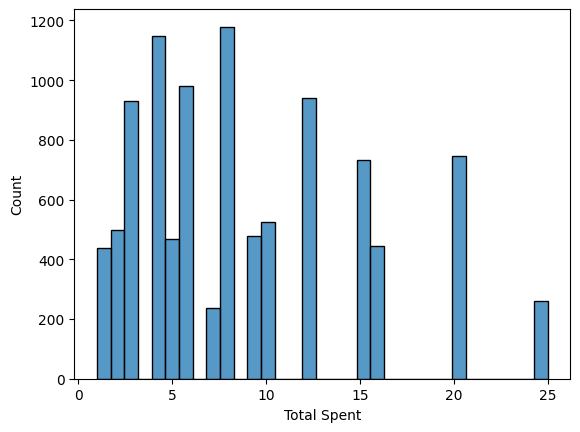

In [84]:
sns.histplot(df['Total Spent'])

Podemos ver que há alguns outliers no gasto do café, por exemplo os valores 20 e 25.

### Boxplot

<Axes: xlabel='Quantity', ylabel='Item'>

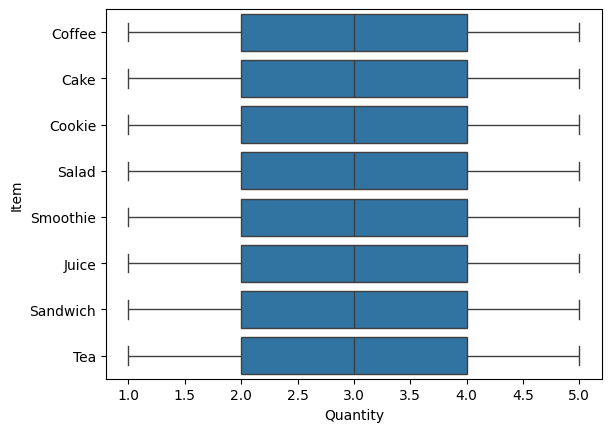

In [85]:
# gerando boxplot da coluna quantidade por tipo de compra
sns.boxplot(data=df, x="Quantity", y="Item")

Não foi encontrado outliers em questão de quantidade por tipo de produto vendido na cafeteria. Onde o intervalo de compra vai de 1 até 5, com os valores mais centralizados em 2 e 4 itens por compra

<Axes: xlabel='Total Spent', ylabel='Item'>

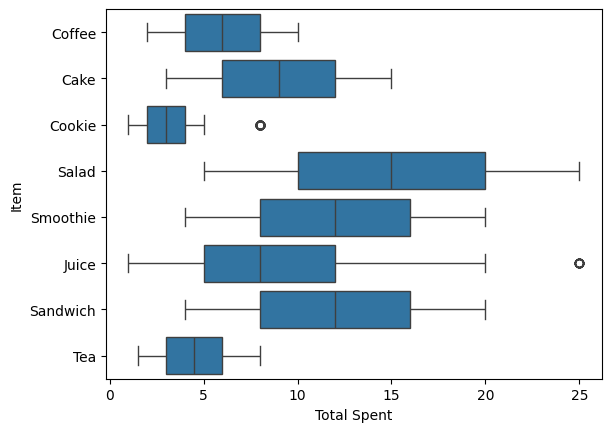

In [86]:
# gerando boxplot da coluna quantidade por tipo de compra
sns.boxplot(data=df, x="Total Spent", y="Item")

Existem alguns valores extremos nos itens Cookie e Juice (suco em português) quando falamos de total gasto em cada um deles. onde no gráfico podemos ver que o maior valor gasto em cookies foi 10 e no suco foi 25.

### Removendo outliers usando IQR

In [87]:
# removendo os outliers da coluna Total spent usando IQR

# Cálculo dos quartis
def removendo_outliers_iqr(df,coluna):
  Q1 = df[coluna].quantile(0.25)
  Q3 = df[coluna].quantile(0.75)
  IQR = Q3 - Q1

  # Limites para considerar um valor como outlier
  limite_inferior = Q1 - 1.5 * IQR
  limite_superior = Q3 + 1.5 * IQR

  # Filtrando os dados para remover os outliers
  df_sem_outliers = df[(df[coluna] >= limite_inferior) & (df[coluna] <= limite_superior)]

  print("Antes:", df.shape[0], "linhas")
  print("Depois:", df_sem_outliers.shape[0], "linhas")
  return df_sem_outliers

In [88]:
df_sem_outliers = removendo_outliers_iqr(df,"Total Spent")

Antes: 10000 linhas
Depois: 9741 linhas


## Normalização das variáveis

### Standard Scale para variáveis categóricas

In [90]:
from sklearn.preprocessing import StandardScaler

In [93]:
def standard_scale(df,coluna):
  scaler = StandardScaler()
  df[coluna] = scaler.fit_transform(df[[coluna]])

In [94]:
standard_scale(df_sem_outliers,'Total Spent')

<ipython-input-93-056fe9e207c7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[coluna] = scaler.fit_transform(df[[coluna]])


In [95]:
standard_scale(df_sem_outliers,'Price Per Unit')

<ipython-input-93-056fe9e207c7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[coluna] = scaler.fit_transform(df[[coluna]])


In [96]:
standard_scale(df_sem_outliers,'Quantity')

<ipython-input-93-056fe9e207c7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[coluna] = scaler.fit_transform(df[[coluna]])


In [98]:
df_sem_outliers.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,-0.715225,-0.740718,-0.838421,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,0.748432,0.080934,0.669095,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,0.748432,-1.562369,-0.084663,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,-0.715225,1.724236,0.292216,Digital Wallet,Takeaway,2023-04-27
4,TXN_3160411,Coffee,-0.715225,-0.740718,-0.838421,Digital Wallet,In-store,2023-06-11


### One-Hot Encoding para variáveis categóricas

Iremos aplicar esse processo só nas colunas 'Item', 'Payment Method','Location'

In [101]:
def one_hot_encoding(df,coluna,prefixo=''):
  dummies = pd.get_dummies(df[coluna], prefix=prefixo,dtype=int)
  return pd.concat([df.drop(coluna, axis=1), dummies], axis=1)


In [99]:
df_sem_outliers = one_hot_encoding(df_sem_outliers,'Item','Item')

In [102]:
df_sem_outliers = one_hot_encoding(df_sem_outliers,'Payment Method','Payment')

In [103]:
df_sem_outliers = one_hot_encoding(df_sem_outliers,'Location','Location')

In [104]:
df_sem_outliers.head()

,Transaction ID,Quantity,Price Per Unit,Total Spent,Transaction Date,Item_Cake,Item_Coffee,Item_Cookie,Item_Juice,Item_Salad,Item_Sandwich,Item_Smoothie,Item_Tea,Payment_Cash,Payment_Credit Card,Payment_Digital Wallet,Location_In-store,Location_Takeaway
0,TXN_1961373,-0.715225,-0.740718,-0.838421,2023-09-08,0,1,0,0,0,0,0,0,0,1,0,0,1
1,TXN_4977031,0.748432,0.080934,0.669095,2023-05-16,1,0,0,0,0,0,0,0,1,0,0,1,0
2,TXN_4271903,0.748432,-1.562369,-0.084663,2023-07-19,0,0,1,0,0,0,0,0,0,1,0,1,0
3,TXN_7034554,-0.715225,1.724236,0.292216,2023-04-27,0,0,0,0,1,0,0,0,0,0,1,0,1
4,TXN_3160411,-0.715225,-0.740718,-0.838421,2023-06-11,0,1,0,0,0,0,0,0,0,0,1,1,0
